In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('/content/Training Data.csv')

In [10]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3.0,13.0,0.0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9.0,13.0,0.0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4.0,10.0,0.0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2.0,12.0,1.0
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3.0,14.0,1.0


# 1. Descriptive Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


1.   Tidak terdapat nilai kosong
2.   Married/Single diganti Marital_Status
3.   Income bisa digantikan float



In [5]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


1. Income dan Experience perlu diteliti lebih lanjut untuk potensi outlier karena rentang nilai yang besar.

2. CURRENT_HOUSE_YRS memiliki rentang yang sempit, yang mungkin perlu diperiksa lebih lanjut apakah ada bias pada data atau kesalahan pengumpulan data.

3. Risk_Flag memiliki distribusi yang condong ke arah nilai 0

# 2. EDA

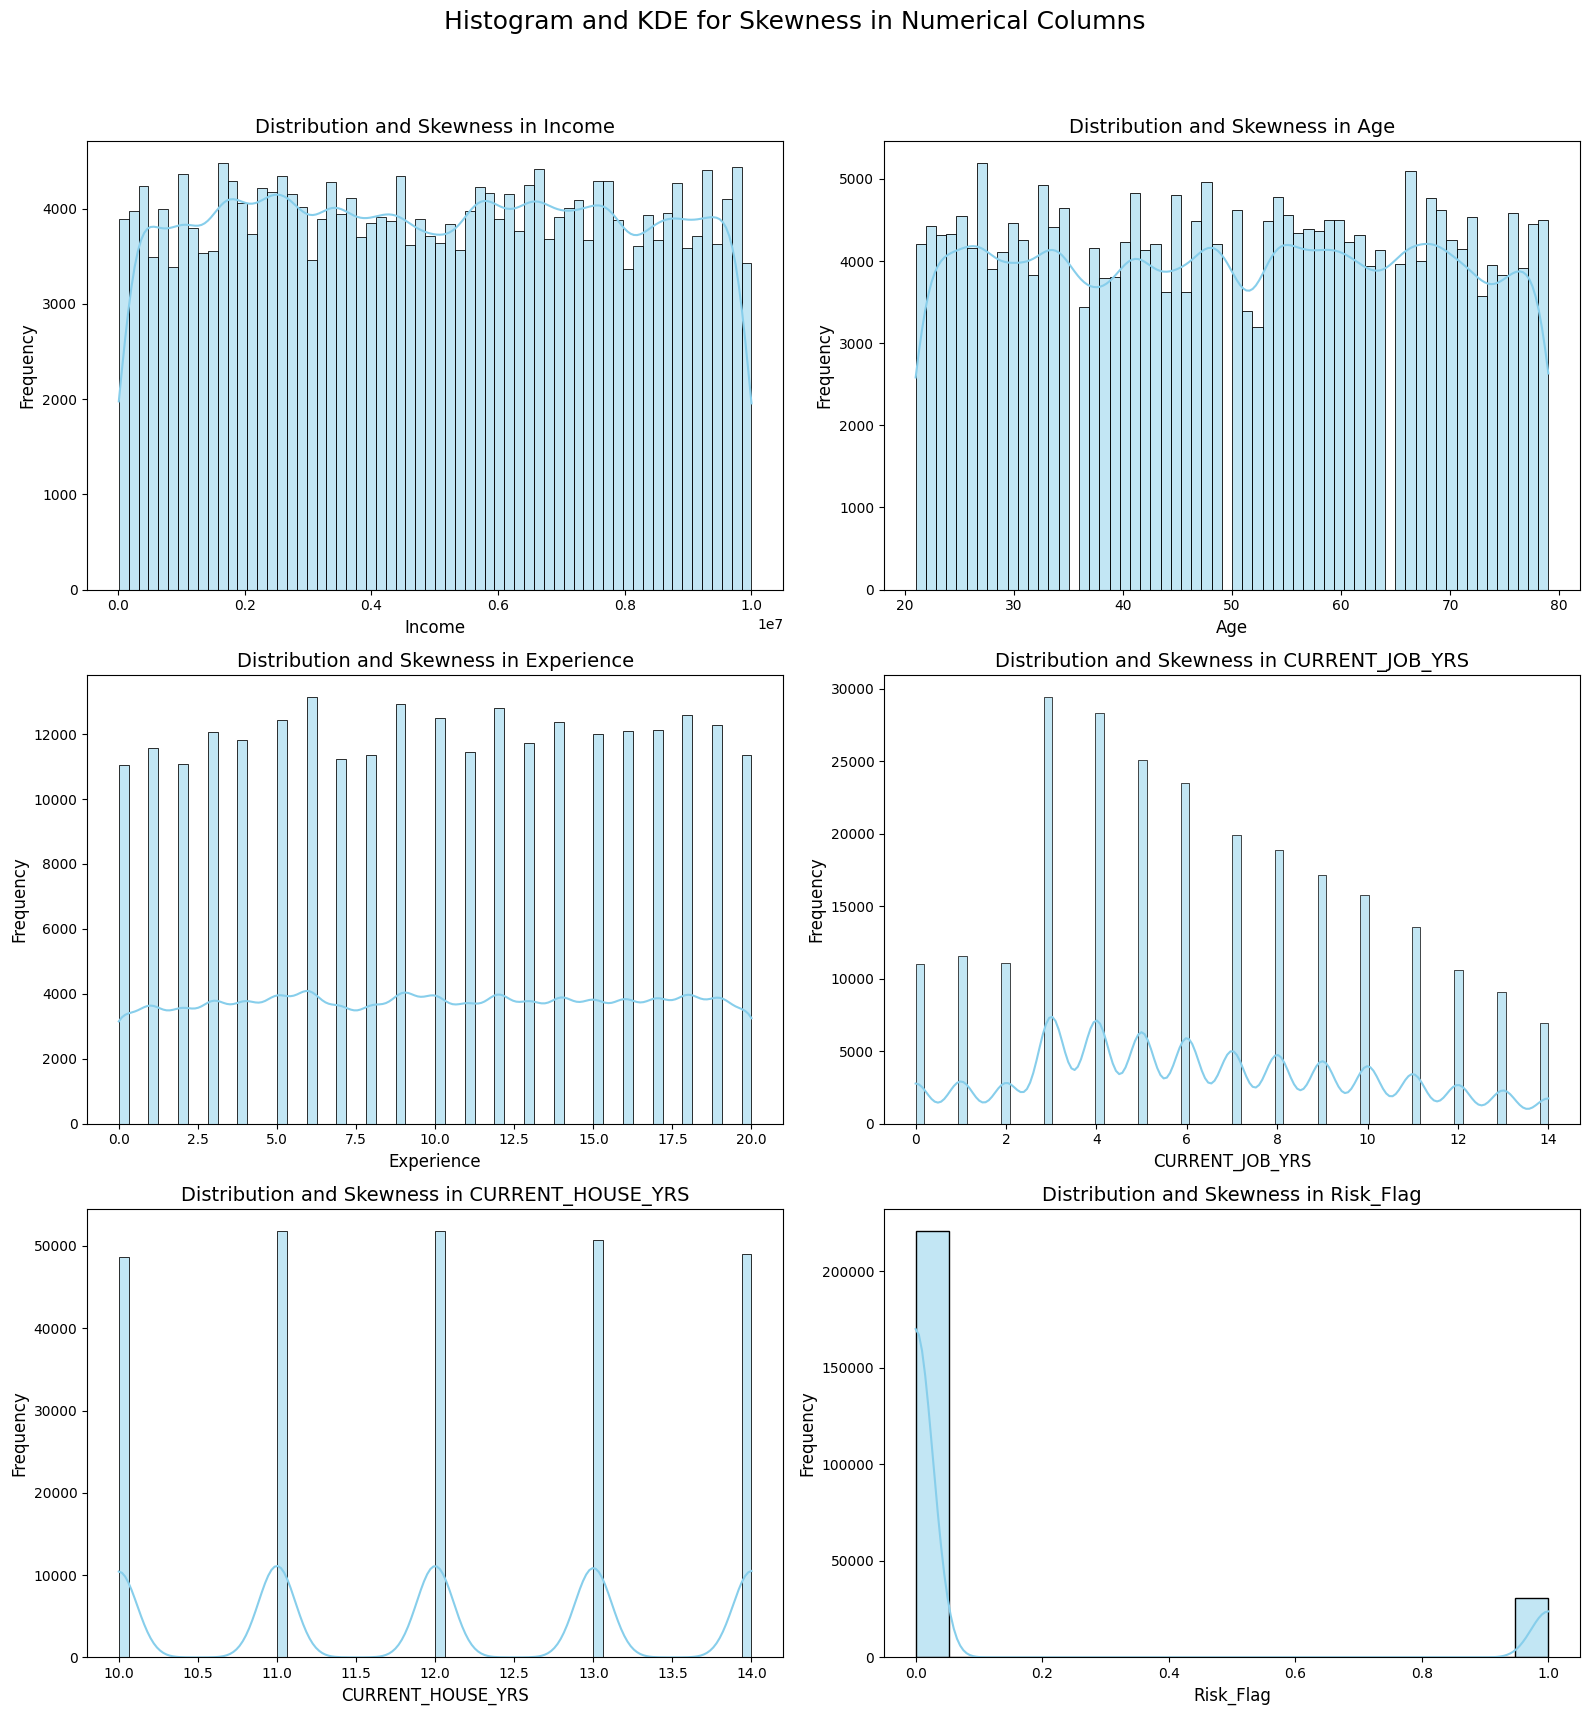

In [6]:
columns = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle("Histogram and KDE for Skewness in Numerical Columns", fontsize=18)

for i, col in enumerate(columns):
    row, col_num = divmod(i, 2)
    sns.histplot(df[col], kde=True, ax=axes[row, col_num], color='skyblue', edgecolor='black')
    axes[row, col_num].set_title(f'Distribution and Skewness in {col}', fontsize=14)
    axes[row, col_num].set_xlabel(col, fontsize=12)
    axes[row, col_num].set_ylabel("Frequency", fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



1. Distribusi Income hampir seragam, tetapi fluktuasi kecil terlihat. Tidak ada nilai yang terlalu dominan, namun rentang yang lebar mungkin mengindikasikan adanya outlier.
Age:

2. Distribusi Age cukup merata dari usia 21 hingga 79 tahun. Tidak ada kelompok usia yang sangat dominan, tetapi terdapat sedikit variasi pada frekuensi di beberapa titik usia tertentu.
Experience:

3. Experience menunjukkan distribusi yang cukup merata, tanpa nilai pengalaman kerja yang mendominasi. Ini mengindikasikan variasi pengalaman kerja yang luas di antara individu.
CURRENT_JOB_YRS:

4. Distribusi CURRENT_JOB_YRS miring ke kanan, dengan sebagian besar individu memiliki masa kerja yang lebih singkat. Pola ini umum dalam data lama kerja, di mana lebih sedikit orang yang bertahan dalam pekerjaan tertentu selama bertahun-tahun.
CURRENT_HOUSE_YRS:

5. Distribusi CURRENT_HOUSE_YRS sangat terbatas pada rentang 10 hingga 14 tahun, dengan puncak yang berulang di setiap nilai. Hal ini menunjukkan bahwa hampir semua individu telah tinggal di tempat tinggal mereka selama periode waktu yang hampir sama, yang perlu ditindaklanjuti untuk memastikan relevansi kolom ini.

6. Distribusi Risk_Flag menunjukkan ketidakseimbangan yang signifikan, dengan mayoritas nilai 0 (tidak berisiko) dan sebagian kecil nilai 1 (berisiko). Ketidakseimbangan ini perlu ditangani saat pre-processing.

1. Outlier Detection pada Income untuk mengidentifikasi dan mengelola nilai ekstrem.
2. Class Balancing pada Risk_Flag untuk menangani ketidakseimbangan kelas.
3. Validasi Data pada CURRENT_HOUSE_YRS untuk memastikan bahwa nilai-nilai yang mendominasi adalah wajar.
4. Normalisasi atau Transformasi pada kolom dengan distribusi yang miring untuk meningkatkan performa analisis atau model.

<ipython-input-11-19fa829d7707>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[row, col_num], palette="viridis")
<ipython-input-11-19fa829d7707>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[row, col_num], palette="viridis")
<ipython-input-11-19fa829d7707>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[row, col_num], palette="viridis")
<ipython-input-11-19fa829d7707>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

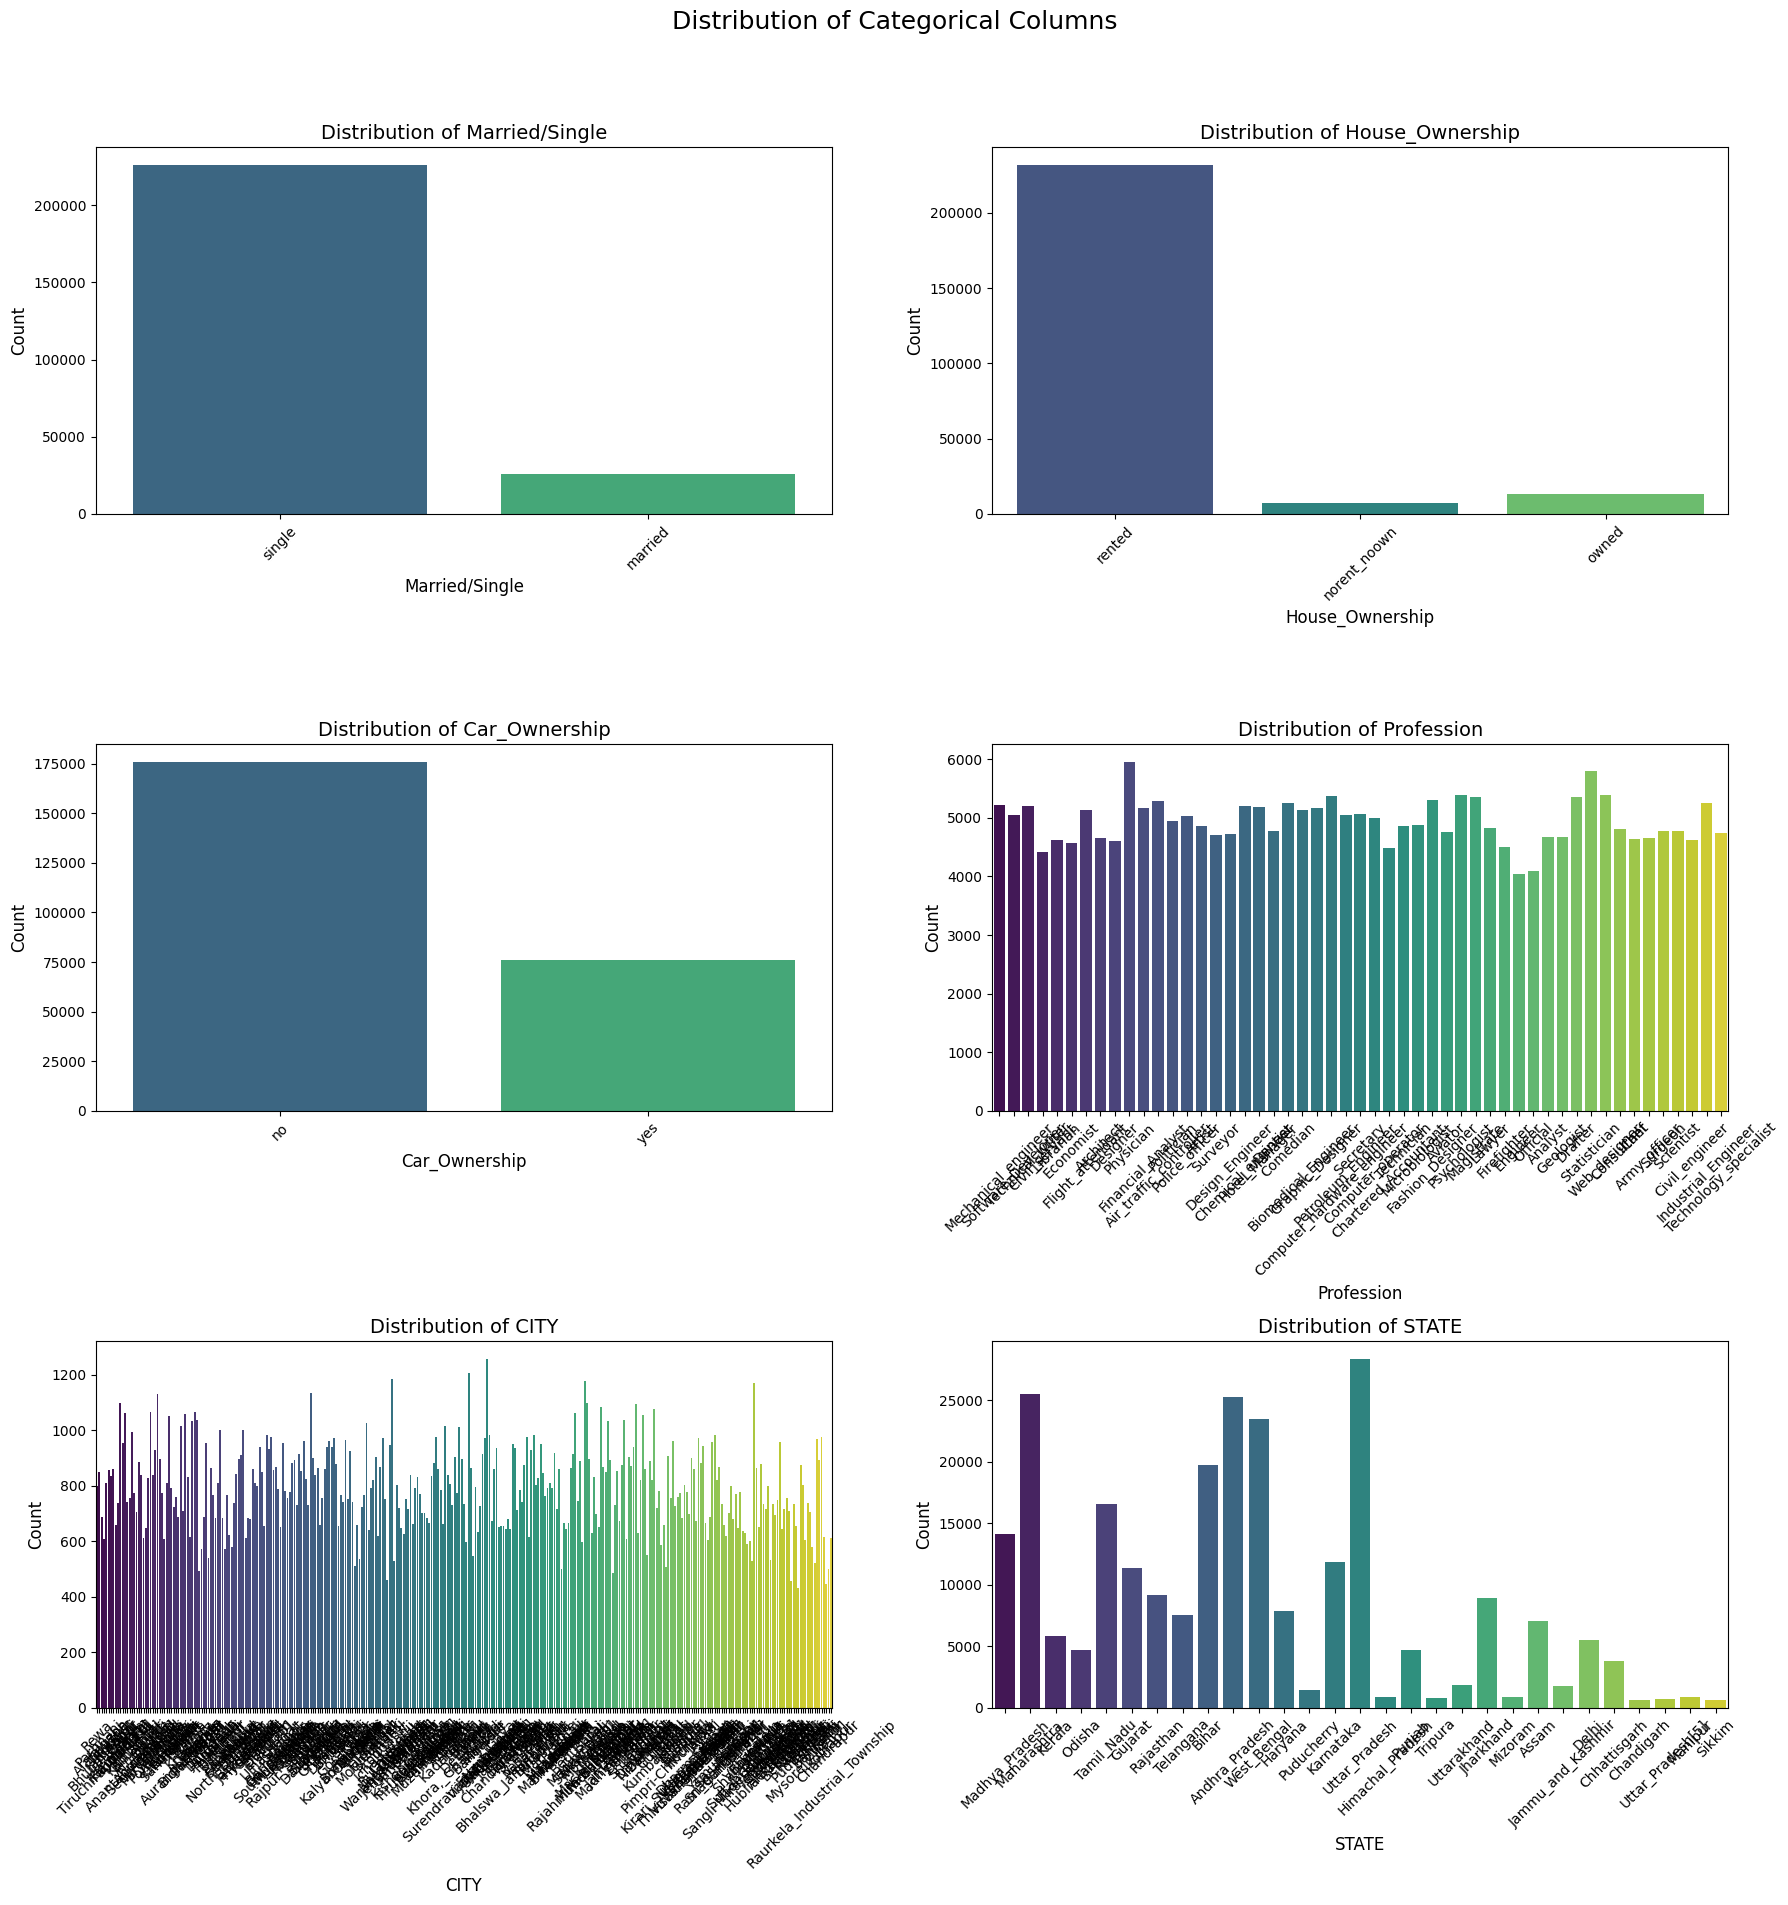

In [ ]:
categorical_columns = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']

fig, axes = plt.subplots(3, 2, figsize=(18, 20))
fig.suptitle("Distribution of Categorical Columns", fontsize=18)

for i, col in enumerate(categorical_columns):
    row, col_num = divmod(i, 2)
    sns.countplot(data=df, x=col, ax=axes[row, col_num], palette="viridis")
    axes[row, col_num].set_title(f'Distribution of {col}', fontsize=14)
    axes[row, col_num].set_xlabel(col, fontsize=12)
    axes[row, col_num].set_ylabel("Count", fontsize=12)
    axes[row, col_num].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


1. Sebagian besar data menunjukkan status single, dengan jumlah yang lebih sedikit pada status married.

2. Mayoritas data memiliki status rented, dengan sebagian kecil owned dan norent_noown.

3. Mayoritas individu tidak memiliki mobil (no), sedangkan sebagian kecil memiliki (yes).


4. Kolom Profession memiliki berbagai kategori pekerjaan, namun tidak ada yang benar-benar mendominasi.

5. Kedua kolom ini memiliki banyak kategori, dengan CITY memiliki lebih banyak variasi dibandingkan STATE.
Tindak Lanjut: Jika terlalu banyak kategori, bisa dilakukan pengelompokan atau pengkodean untuk menyederhanakan. Ini akan membantu menghindari masalah sparsity dalam analisis atau pemodelan.

**Rekomendasi Tindak Lanjut Pre-Processing**

1. Lakukan encoding pada kolom kategorikal, terutama Profession, CITY, dan STATE, serta pertimbangkan pengelompokan pada kolom dengan kategori terlalu banyak.

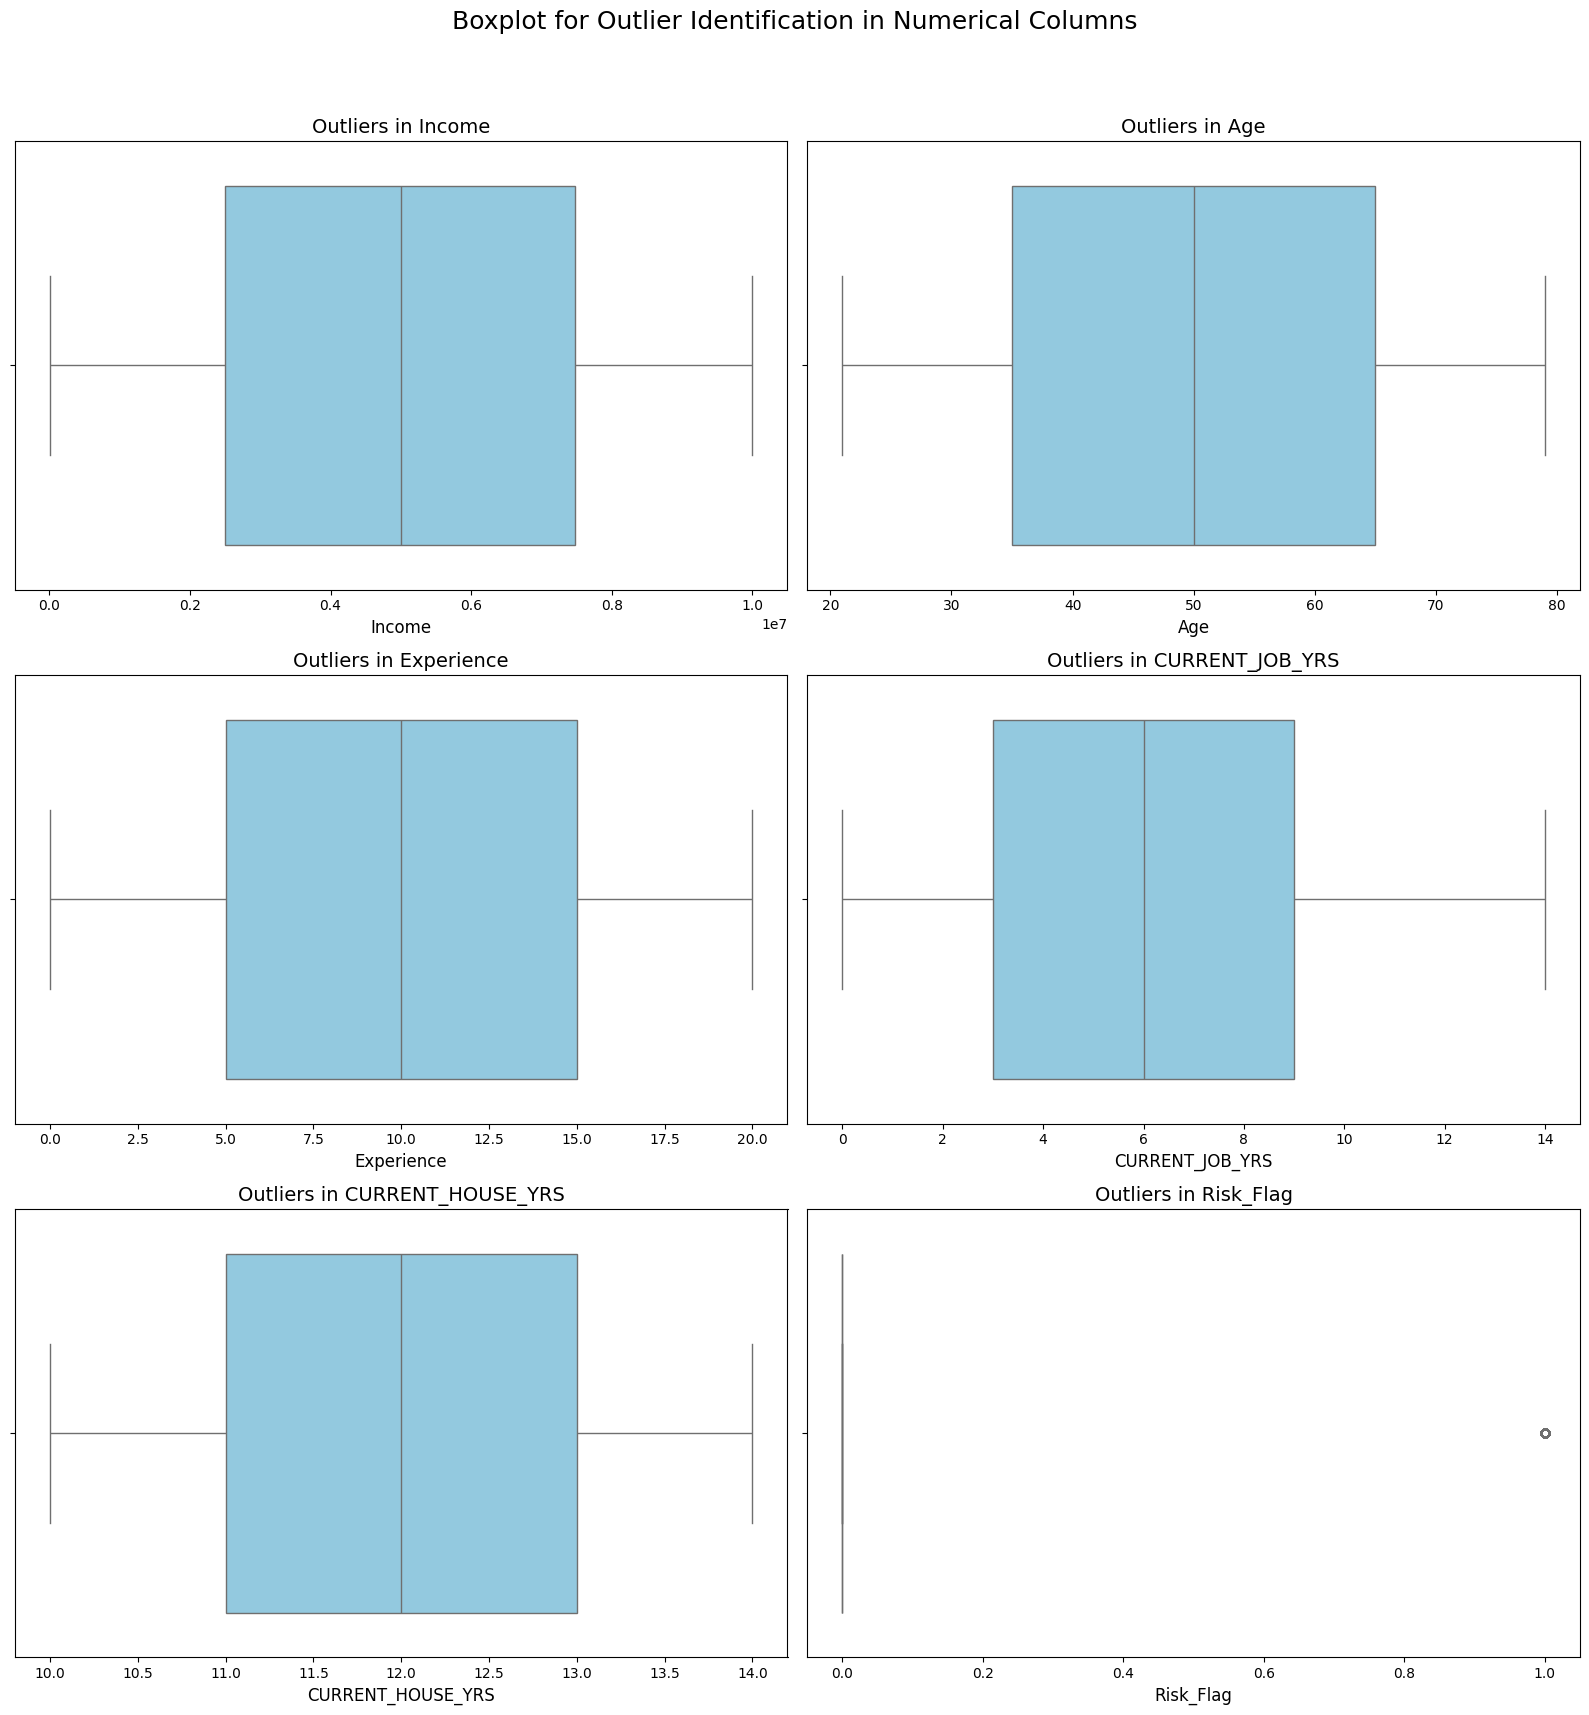

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle("Boxplot for Outlier Identification in Numerical Columns", fontsize=18)

for i, col in enumerate(columns):
    row, col_num = divmod(i, 2)
    sns.boxplot(x=df[col], ax=axes[row, col_num], color='skyblue')
    axes[row, col_num].set_title(f'Outliers in {col}', fontsize=14)
    axes[row, col_num].set_xlabel(col, fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Tidak ada outlier

# 3. Multivariate Analysis

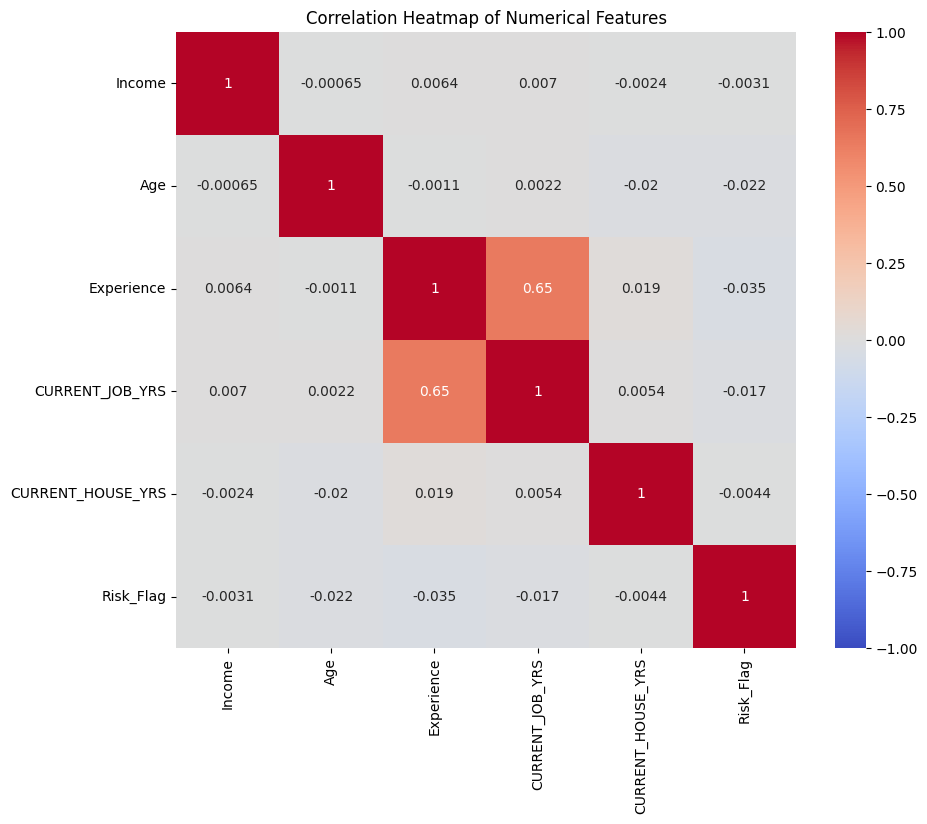

In [ ]:
import numpy as np

numerical_data = df[['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']]
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


**Korelasi antara Fitur dan Label (Risk_Flag)**

- Berdasarkan heatmap korelasi, kita dapat melihat bahwa tidak ada fitur numerik yang memiliki korelasi yang kuat dengan Risk_Flag. Korelasi yang ada berada di kisaran rendah, dengan nilai korelasi terbesar di sekitar -0.035 antara Experience dan Risk_Flag.

- Ini menunjukkan bahwa tidak ada satu fitur numerik yang secara langsung sangat terkait dengan Risk_Flag. Meski begitu, fitur seperti Experience, Age, dan CURRENT_JOB_YRS tetap bisa dipertahankan untuk memperkaya model, karena mereka mungkin memberikan kontribusi minor saat digabungkan dengan variabel lain.

**Korelasi Antar-Fitur**

- Feature Selection: Pertahankan fitur Experience, Age, dan CURRENT_JOB_YRS, meskipun korelasinya rendah dengan Risk_Flag. Mereka masih mungkin memberikan informasi berguna saat digunakan dalam model machine learning.

- Handling Redundancy: Lakukan uji tambahan (seperti feature importance dalam model) untuk menentukan apakah salah satu dari Experience atau CURRENT_JOB_YRS dapat dihapus untuk mengurangi redundansi tanpa mengorbankan akurasi model.

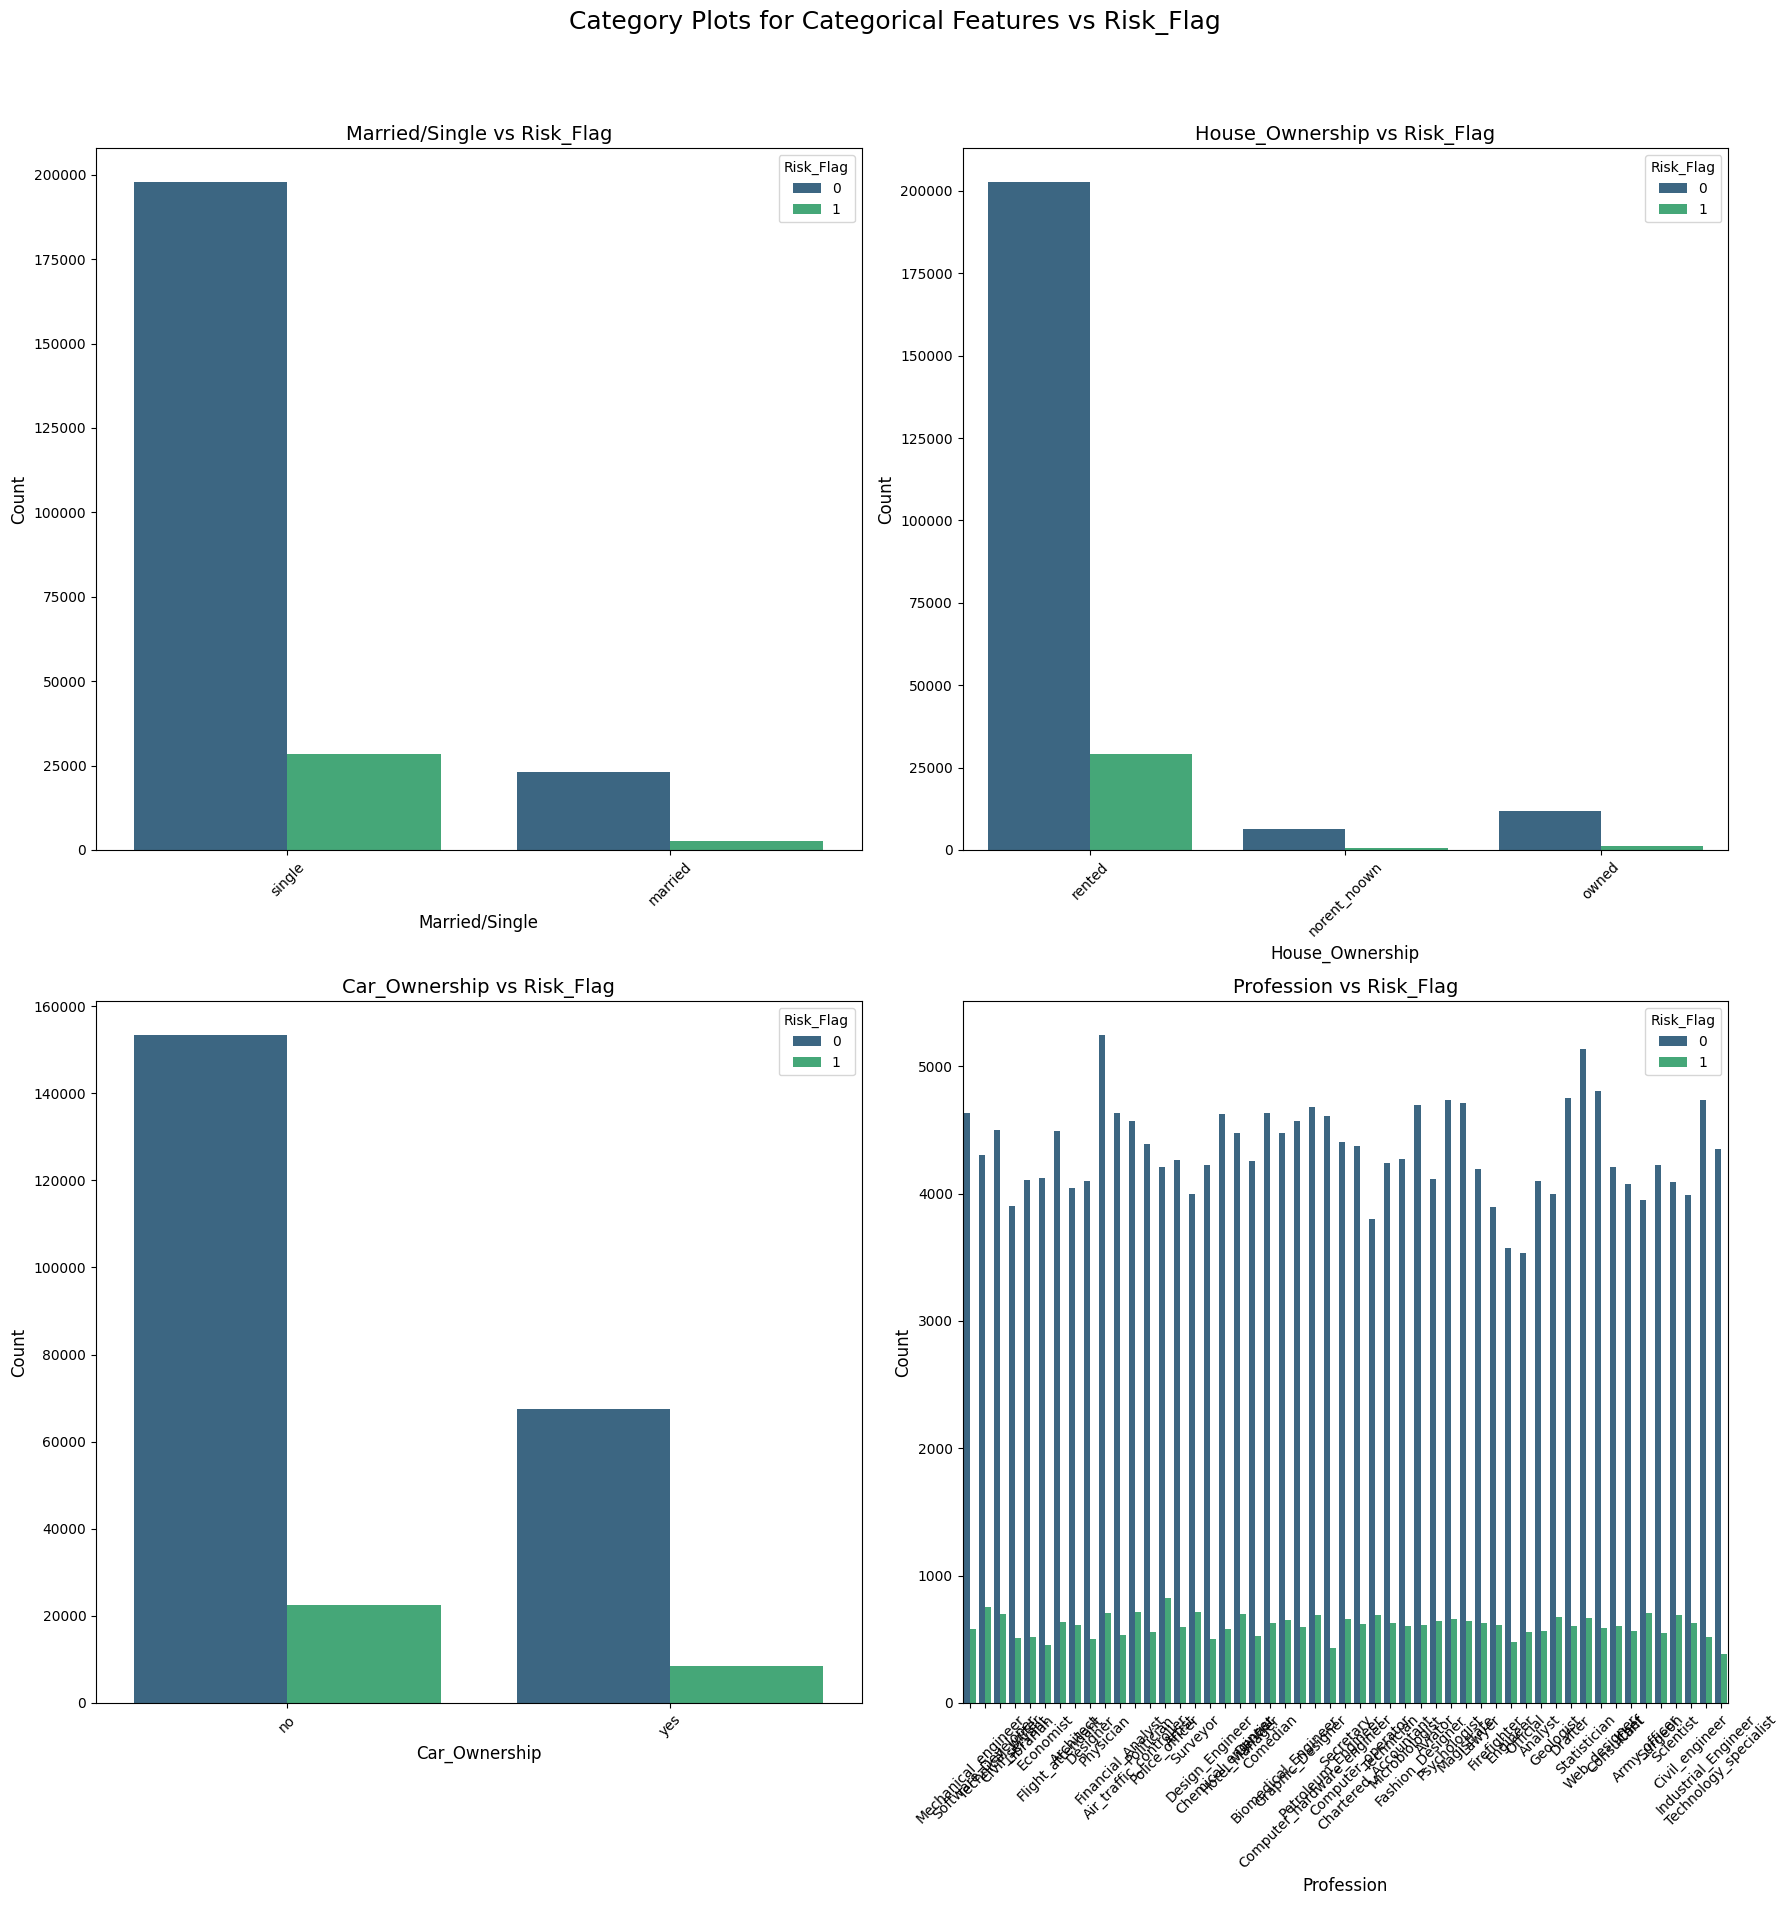

In [ ]:
categorical_columns = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession']

fig, axes = plt.subplots(2, 2, figsize=(18, 20))
fig.suptitle("Category Plots for Categorical Features vs Risk_Flag", fontsize=18)

for i, col in enumerate(categorical_columns):
    row, col_num = divmod(i, 2)
    sns.countplot(data=df, x=col, hue="Risk_Flag", ax=axes[row, col_num], palette="viridis")
    axes[row, col_num].set_title(f'{col} vs Risk_Flag', fontsize=14)
    axes[row, col_num].set_xlabel(col, fontsize=12)
    axes[row, col_num].set_ylabel("Count", fontsize=12)
    axes[row, col_num].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Korelasi Setiap Fitur dengan Risk_Flag**

1. Marital Status: Single lebih berisiko (Risk_Flag 1) dibandingkan married. Relevan.
2. House Ownership: Rented memiliki risiko lebih tinggi. Sangat relevan.
3. Car Ownership: Pemilik mobil cukup seimbang antara risiko tinggi dan rendah. Relevansi moderat.
4. Profession: Risiko bervariasi antar-profesi. Sangat relevan.

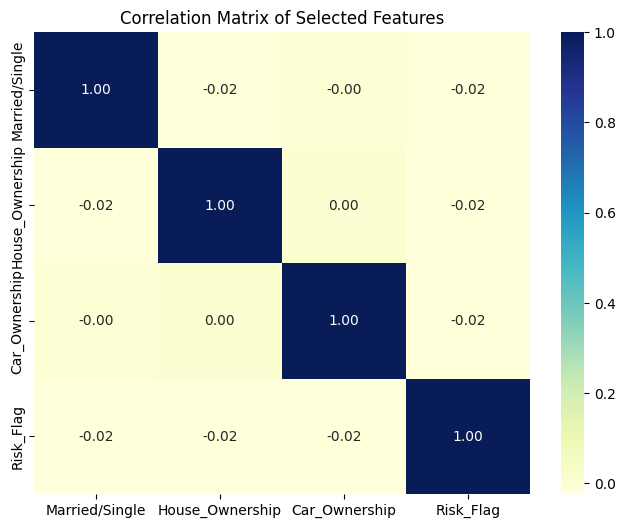

In [19]:
encoded_data = df.copy()
encoded_data['Married/Single'] = encoded_data['Married/Single'].map({'single': 0, 'married': 1})
encoded_data['House_Ownership'] = encoded_data['House_Ownership'].map({'rented': 0, 'owned': 1, 'norent_noown': 2})
encoded_data['Car_Ownership'] = encoded_data['Car_Ownership'].map({'no': 0, 'yes': 1})

correlation_matrix = encoded_data[['Married/Single', 'House_Ownership', 'Car_Ownership', 'Risk_Flag']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix of Selected Features")
plt.show()

Tidak ada kolerasi yang berarti

# 4. Business Insight

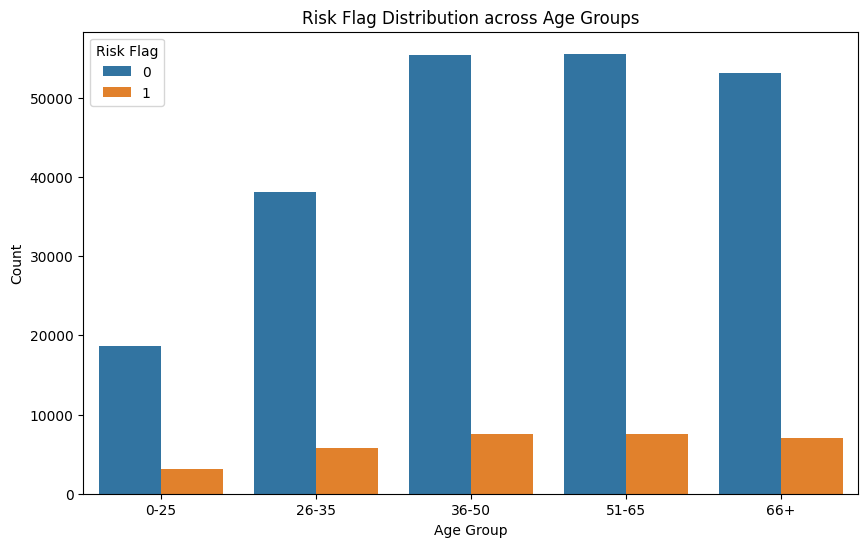

In [51]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 50, 65, 100], labels=["0-25", "26-35", "36-50", "51-65", "66+"])
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', hue='Risk_Flag', data=df)
plt.title("Risk Flag Distribution across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Risk Flag")
plt.show()

**INSIGHT**

1. Usia 0-25 Tahun:
Di kelompok usia ini, jumlah risiko tinggi relatif rendah. Ini mungkin karena mereka belum memiliki banyak komitmen finansial yang besar.
2. Usia 26-35 Tahun: Risiko tinggi mulai meningkat di kelompok usia ini, yang bisa dikaitkan dengan komitmen finansial awal, seperti cicilan kendaraan atau pembelian rumah.
3. Usia 36-50 Tahun: Kelompok usia ini memiliki jumlah pengguna terbanyak dan menunjukkan risiko yang signifikan. Di usia ini, biasanya ada kewajiban finansial besar, seperti cicilan rumah atau biaya pendidikan anak.
4. Usia 51-65 Tahun dan 66+: Di kelompok usia ini, jumlah risiko tinggi stabil. Mereka mungkin sudah memiliki keuangan yang lebih stabil tetapi mulai memikirkan persiapan pensiun atau risiko kesehatan.

**BUSINESS RECOMENDATION**

1. Usia 0-25 Tahun:
- Produk Tabungan dan Investasi Awal: Kami menyarankan menyediakan produk tabungan jangka panjang atau investasi kecil untuk membantu mereka mulai menabung.
- Program Edukasi Finansial: Edukasi tentang manajemen keuangan bisa membangun kebiasaan positif di awal perjalanan finansial mereka.

2. Usia 26-35 Tahun:

- Pinjaman Konsumtif: Sediakan produk pinjaman seperti untuk kendaraan atau renovasi rumah dengan persyaratan fleksibel, yang relevan dengan gaya hidup mereka.
- Asuransi Dasar: Mulailah menawarkan asuransi kesehatan atau kecelakaan sederhana yang bisa memberikan perlindungan dasar.

3. Usia 36-50 Tahun:

- Konsultasi Keuangan: Di usia ini, konsultasi keuangan bisa membantu mereka mengelola aset dan persiapan keuangan masa depan.
- Asuransi Komprehensif: Produk asuransi kesehatan, jiwa, dan properti komprehensif bisa sesuai dengan kebutuhan mereka yang sudah kompleks.

4. Usia 51-65 Tahun dan 66+:

- Program Persiapan Pensiun: Produk tabungan pensiun atau investasi stabil yang berisiko rendah bisa menarik bagi mereka.
- Asuransi Kesehatan Jangka Panjang: Mengingat usia mereka, asuransi kesehatan dan perawatan jangka panjang akan menjadi produk yang sangat relevan.


In [34]:
profession_risk = df.groupby('Profession')['Risk_Flag'].mean().reset_index()
profession_risk.columns = ['Profession', 'Risk_Probability']

profession_risk = profession_risk.sort_values(by='Risk_Probability', ascending=False)

profession_risk


,Profession,Risk_Probability
3,Army_officer,0.210953
38,Police_officer,0.193609
10,Civil_engineer,0.185031
7,Chartered_Accountant,0.184549
41,Scientist,0.178357
43,Software_Developer,0.177570
5,Aviator,0.172485
46,Surveyor,0.171429
35,Official,0.167070
42,Secretary,0.166969


<ipython-input-37-c545d1fa4b5a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profession', y='Risk_Probability', data=top_5_highest, palette="viridis")


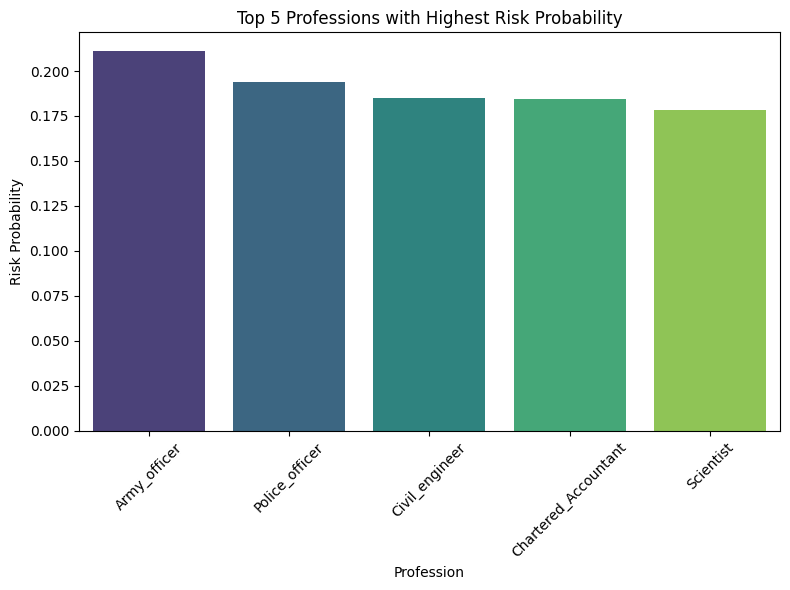

<ipython-input-37-c545d1fa4b5a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profession', y='Risk_Probability', data=top_5_lowest, palette="viridis")


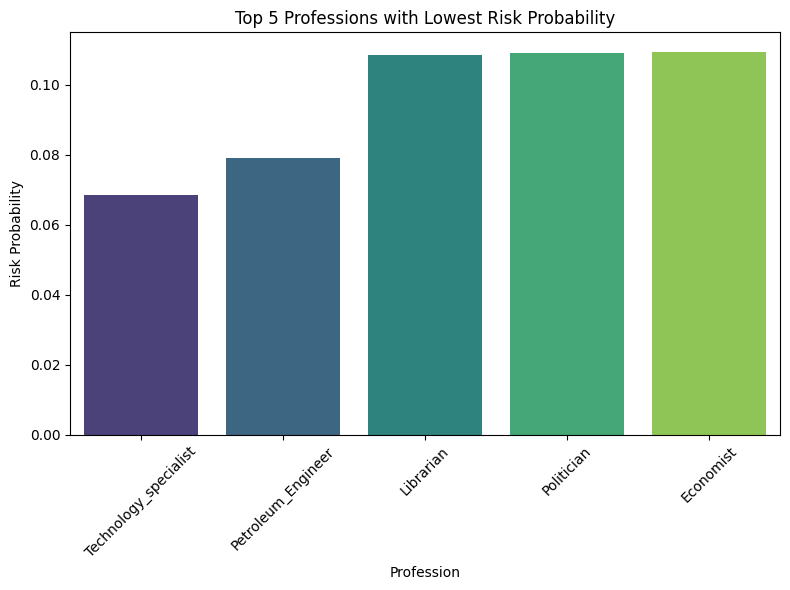

In [37]:
top_5_highest = profession_risk.nlargest(5, 'Risk_Probability')
top_5_lowest = profession_risk.nsmallest(5, 'Risk_Probability')

# Plot the top 5 highest risk probabilities (vertical bars)
plt.figure(figsize=(8, 6))
sns.barplot(x='Profession', y='Risk_Probability', data=top_5_highest, palette="viridis")
plt.title("Top 5 Professions with Highest Risk Probability")
plt.xlabel("Profession")
plt.ylabel("Risk Probability")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the top 5 lowest risk probabilities (vertical bars)
plt.figure(figsize=(8, 6))
sns.barplot(x='Profession', y='Risk_Probability', data=top_5_lowest, palette="viridis")
plt.title("Top 5 Professions with Lowest Risk Probability")
plt.xlabel("Profession")
plt.ylabel("Risk Probability")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Profesi Risiko Tinggi (contoh: Police Officer, Chartered Accountant, Army Officer,Scientist,Civil Engineer): <br>
Tingkat risiko lebih tinggi karena tanggung jawab besar atau lingkungan kerja yang berisiko.

3. Profesi Risiko Rendah (contoh: Librarian, Politician, Economist Petroleum Engineer, Technology Specialist):
<br> Posisi stabil dengan penghasilan baik dan tanggung jawab yang lebih terfokus.


1. Profesi Risiko Tinggi
- Asuransi Komprehensif: Tawarkan asuransi jiwa dan kecelakaan.
- Persyaratan Kredit Ketat: Terapkan syarat kredit ketat atau pinjaman dengan jaminan.

2. Profesi Risiko Rendah
- Investasi Premium: Berikan produk investasi dengan imbal hasil tinggi.
- Kredit Bunga Rendah: Tawarkan pinjaman dengan bunga lebih rendah.

<ipython-input-25-57fe52269f4e>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_risk_counts = df.groupby(['Income_Level', 'Risk_Flag']).size().unstack().fillna(0)


<Figure size 1000x600 with 0 Axes>

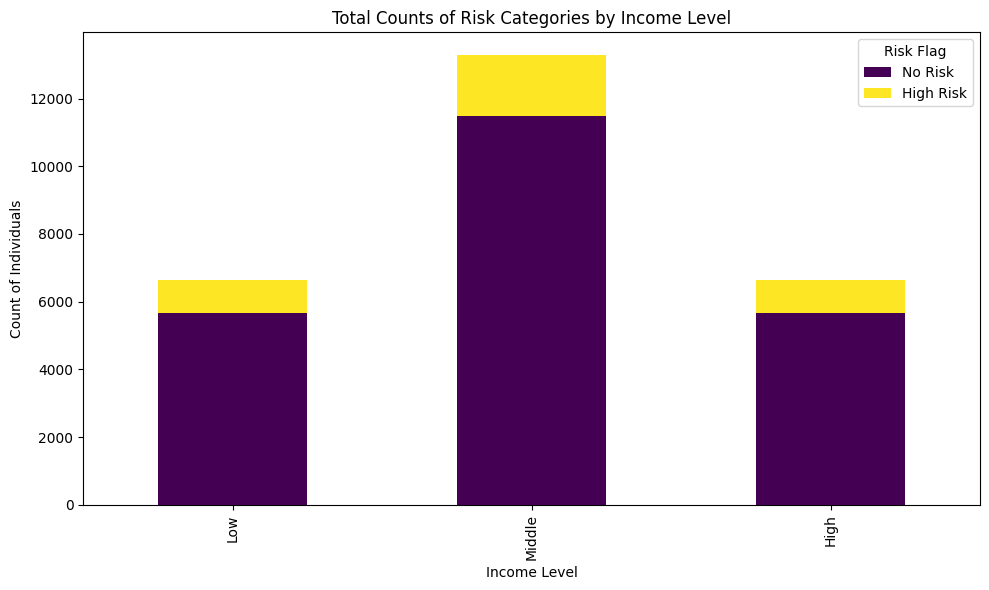

In [25]:

income_bins = [0, df['Income'].quantile(0.25), df['Income'].quantile(0.75), df['Income'].max()]
income_labels = ['Low', 'Middle', 'High']
df['Income_Level'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, include_lowest=True)

# Group by Income_Level and Risk_Flag, and prepare data for visualization
income_risk_counts = df.groupby(['Income_Level', 'Risk_Flag']).size().unstack().fillna(0)
income_risk_counts.columns = ['No Risk', 'High Risk']
income_risk_counts = income_risk_counts.reset_index()

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
income_risk_counts.plot(x='Income_Level', kind='bar', stacked=True, colormap="viridis", figsize=(10, 6))
plt.title("Total Counts of Risk Categories by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Count of Individuals")
plt.legend(title="Risk Flag", labels=["No Risk", "High Risk"])
plt.tight_layout()
plt.show()


In [58]:
print("Income Level Risk Counts Table:")
income_risk_counts

Income Level Risk Counts Table:


,Income_Level,No Risk,High Risk
0,Low,54942,8059
1,Lower-Middle,55486,7513
2,Middle,55546,7466
3,Upper-Middle,33063,4787
4,High,21967,3171


Insight:
1. Pendapatan Menengah: Memiliki jumlah individu berisiko tinggi terbanyak, menunjukkan adanya kerentanan finansial di kelompok ini.
2. Pendapatan Tinggi: Memiliki proporsi risiko tinggi yang lebih rendah, menunjukkan stabilitas finansial lebih baik.
3. Pendapatan Rendah: Meskipun jumlahnya lebih kecil, terdapat proporsi individu berisiko tinggi yang signifikan.

1. Produk Finansial Terarah:
    - Pendapatan Menengah: Tawarkan produk untuk mengelola risiko, seperti asuransi atau investasi moderat.
    - Pendapatan Tinggi: Fokus pada layanan premium seperti manajemen kekayaan.
    - Pendapatan Rendah: Sediakan produk keuangan dasar dan edukasi literasi finansial.

2. Program Mitigasi Risiko:

    - Adakan workshop literasi finansial bagi kelompok menengah dan rendah untuk membantu mereka mengelola risiko finansial.

3. Kampanye Pemasaran Tertarget:

  - Sesuaikan kampanye pemasaran dengan kebutuhan spesifik tiap kelompok, khususnya fokus pada mitigasi risiko untuk pendapatan menengah.

4. Peluang Cross-Selling:

  - Tawarkan produk investasi untuk individu pendapatan menengah berisiko rendah dan layanan eksklusif untuk pendapatan tinggi.


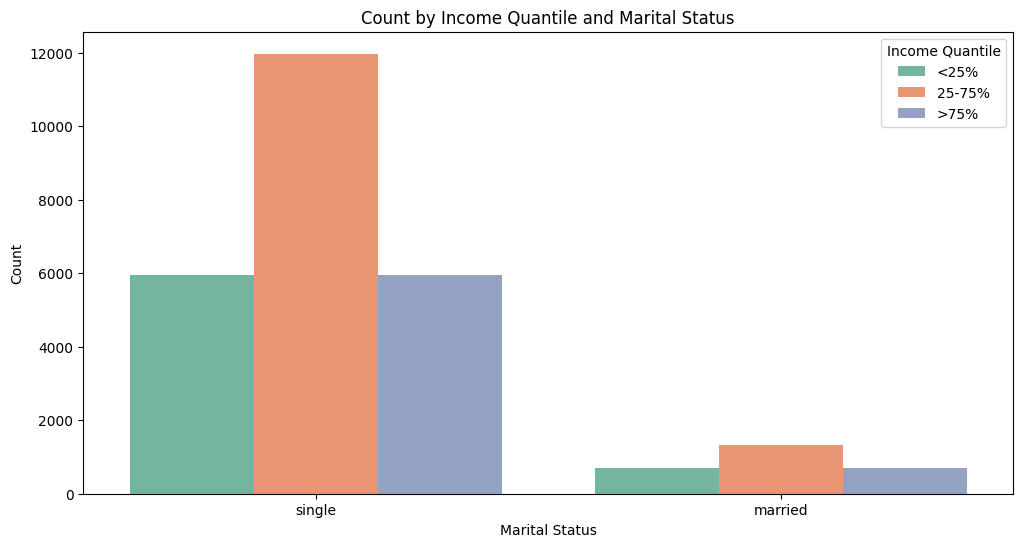

In [22]:
income_quantiles = df['Income'].quantile([0.25, 0.75])
df['Income_Category'] = pd.cut(df['Income'],
                                          bins=[-float('inf'), income_quantiles[0.25], income_quantiles[0.75], float('inf')],
                                          labels=['<25%', '25-75%', '>75%'])

data_filtered = df[df['Married/Single'].isin(['married', 'single'])]

plt.figure(figsize=(12, 6))
sns.countplot(data=data_filtered, x='Married/Single', hue='Income_Category', dodge=True, palette="Set2")
plt.title("Count by Income Quantile and Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend(title="Income Quantile")
plt.show()

Insight:
1. Status Pernikahan dan Kuantile Pendapatan:
  - Mayoritas individu lajang berada di kuantile pendapatan menengah (25-75%), sementara proporsi individu lajang di kuantile atas (>75%) dan bawah (<25%) cukup seimbang.

  - Untuk individu menikah, jumlahnya jauh lebih sedikit di semua kuantile, dengan distribusi yang lebih merata di ketiga kuantile pendapatan.
2. Distribusi yang Dominan pada Individu Lajang:

  - Lajang dengan pendapatan menengah mendominasi secara signifikan, menunjukkan bahwa segmen ini lebih besar dibandingkan dengan yang menikah.

Rekomendasi Bisnis:
1. Strategi Produk untuk Lajang Berpendapatan Menengah:

    - Tawarkan produk investasi atau tabungan jangka panjang yang fleksibel, karena segmen ini kemungkinan besar ingin menabung atau berinvestasi untuk masa depan.
    - Manfaatkan pemasaran digital dengan kampanye yang berfokus pada stabilitas keuangan untuk masa depan, dengan pesan yang relevan bagi individu lajang.
2. Penawaran untuk Pasangan Menikah:

  - Meskipun proporsinya lebih kecil, pasangan menikah mungkin memerlukan produk keuangan bersama, seperti asuransi keluarga atau tabungan pendidikan anak.
  - Pertimbangkan kampanye personalisasi yang menyoroti manfaat produk keuangan yang dirancang untuk keluarga kecil.
3. Pendekatan Pemasaran yang Tertarget:

  - Untuk individu lajang di kuantile 25-75%, gunakan strategi pemasaran dengan pesan terkait peningkatan dan stabilitas finansial.
  - Untuk individu dengan pendapatan >75%, baik lajang maupun menikah, fokus pada layanan premium seperti manajemen kekayaan.

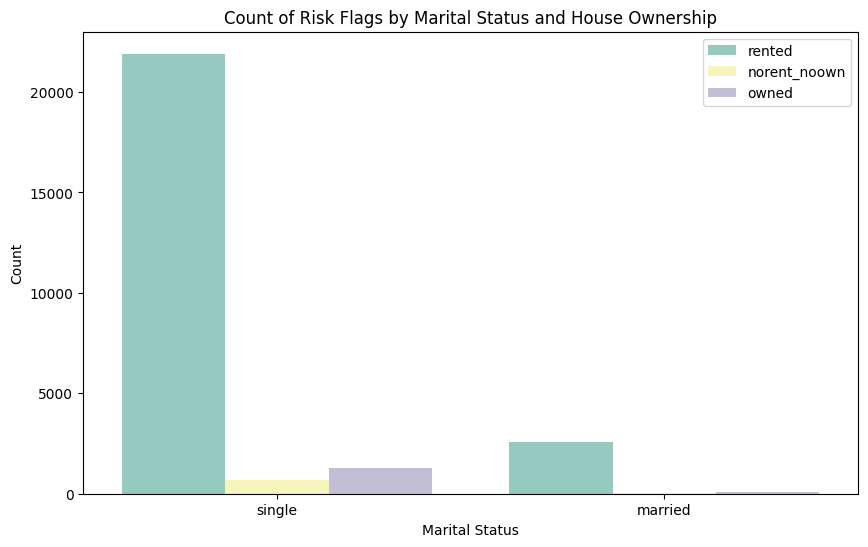

In [39]:
filtered_df = df[(df['Married/Single'] != 'sin') & (df['House_Ownership'] != 'nan')]

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='Married/Single', hue='House_Ownership', palette="Set3", dodge=True, hue_order=filtered_df['House_Ownership'].unique())
plt.title("Count of Risk Flags by Marital Status and House Ownership")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend().set_title(None)
plt.show()

Insight:
- Mayoritas Lajang Menyewa Rumah: Sebagian besar individu lajang berada dalam kategori "rented."
- Kepemilikan Rumah Rendah: Baik lajang maupun menikah menunjukkan tingkat kepemilikan rumah yang rendah dibandingkan opsi lain.

Rekomendasi Bisnis:
- Tawarkan Program Kepemilikan Rumah: Sasaran utama adalah lajang yang ingin transisi dari menyewa ke memiliki rumah.
- Produk Asuransi untuk Penyewa: Berikan perlindungan asuransi bagi penyewa, mengingat tingginya jumlah individu yang menyewa.

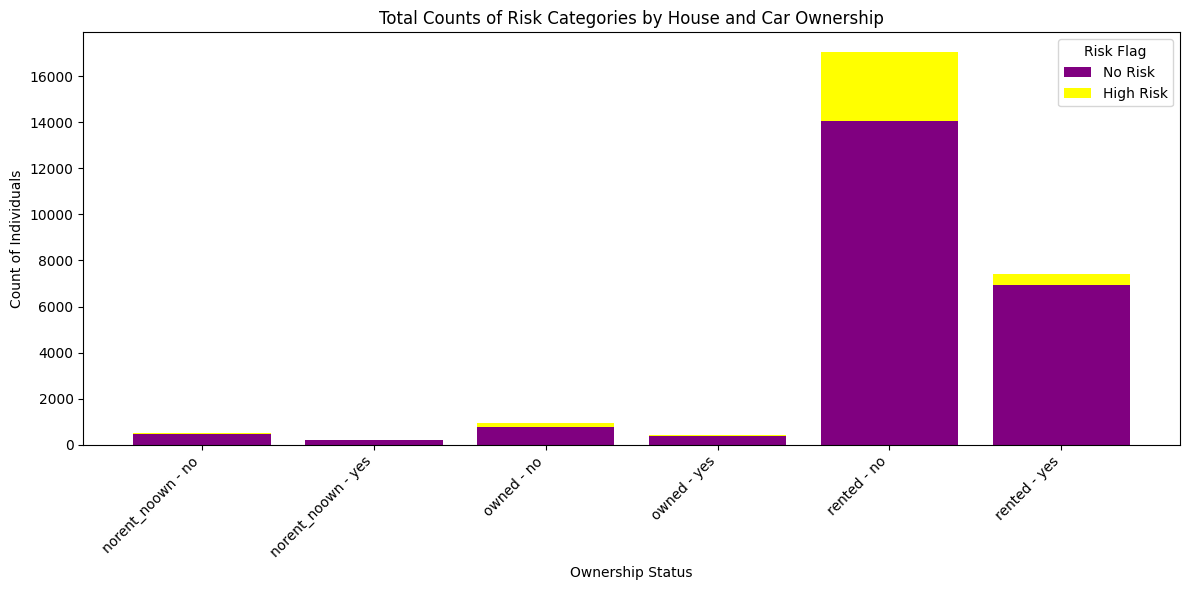

In [41]:
ownership_risk_counts = df.groupby(['House_Ownership', 'Car_Ownership', 'Risk_Flag']).size().unstack(fill_value=0)
ownership_risk_counts.columns = ['No Risk', 'High Risk']
ownership_risk_counts = ownership_risk_counts.reset_index()

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))

# Plot 'No Risk' bars
plt.bar(
    x=ownership_risk_counts.index,
    height=ownership_risk_counts['No Risk'],
    label='No Risk',
    color='purple'
)

# Plot 'High Risk' bars on top of 'No Risk' bars
plt.bar(
    x=ownership_risk_counts.index,
    height=ownership_risk_counts['High Risk'],
    bottom=ownership_risk_counts['No Risk'],
    label='High Risk',
    color='yellow'
)

# Set x-tick labels to show 'House_Ownership' and 'Car_Ownership' combinations
plt.xticks(
    ticks=ownership_risk_counts.index,
    labels=[f"{row['House_Ownership']} - {row['Car_Ownership']}" for _, row in ownership_risk_counts.iterrows()],
    rotation=45,
    ha="right"
)

plt.title("Total Counts of Risk Categories by House and Car Ownership")
plt.xlabel("Ownership Status")
plt.ylabel("Count of Individuals")
plt.legend(title="Risk Flag")
plt.tight_layout()
plt.show()


Insight:
- Penyewa Tanpa Mobil: Kelompok terbesar adalah individu yang menyewa rumah tanpa memiliki mobil, dengan proporsi risiko rendah dan tinggi yang signifikan.
- Kepemilikan Mobil pada Penyewa: Penyewa yang memiliki mobil menunjukkan jumlah individu berisiko lebih rendah dibandingkan penyewa tanpa mobil.

Rekomendasi Bisnis:
- Penawaran Asuransi Mobil untuk Penyewa: Berikan insentif asuransi mobil bagi penyewa untuk mengurangi risiko finansial mereka.
- Program Kepemilikan Rumah: Tawarkan program transisi dari menyewa ke memiliki rumah, terutama bagi penyewa tanpa mobil untuk membantu meningkatkan stabilitas finansial mereka.